# Algoritmos de Regressão Houses Prices:
## Random Forest e Redes Neurais

Nesse Notebook vou usar dois modelos diferentes para montar um algoritmo de regressão com o objetivo de prever os preços de algumas casas.

## Conteúdo
#### **Início - Importando Bibliotecas**

#### **1.0 - Explorando Base de Dados**
- 1.1 Buscando Valores Faltantes
- 1.2 Correlação Entre Atributos(Heatmap)
- 1.3 Correlação Preço x Todos os Atributos

#### 2.0 - Separando X e Y

#### 3.0 - Random Forest
- 3.1 Separando Base de Treinamento e Teste
- 3.2 Criando Regressor
- 3.3 Score Atingido
- 3.4 Mean Absolute Error
- 3.5 - Visualização do Gráfico

#### 4.0 - Redes Neurais
- 4.1 - Base de Dados
- 4.2- Colocando os Dados em Escala
- 4.3 - Criando Regressor
- 4.4 - Score Atingido
- 4.5 - Mean Absolute Error
- 4.6 - Visualização do Gráfico

### Início: Importando Bibliotecas

In [10]:
# Letirua da Base de Dados
import pandas as pd
import numpy as np

## Regressores
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# Metricas
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error

# Tratamento dos Dados (Escalonamento)
from sklearn.preprocessing import StandardScaler

# Biblioteca Gráfica para visualização
from matplotlib import pyplot as plt
import seaborn as sns

## 1.0 Explorando a Base de Dados
Vamos dar uma olhada em algumas informações sobre essa base de dados. Primeiro vamos fazer a importação da base de dados e exibimos os 5 primeiros registros.

In [11]:
base = pd.read_csv('kc_house_data.csv')
base.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 1.1 Buscando Valores Inconsistentes
Antes de treinarmos um modelo de regressão, precisamos saber se existentes valores faltantes na base de dados que poderiam atrapalhar nosso trabalho.


In [12]:
base.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Felizmente, nenhuma das colunas contém valores faltantes.

## 1.2 - Correlação entre Atributos (Heatmap)
Vamos dar uma olhada em qual a correlação dos atributos tem entre si.

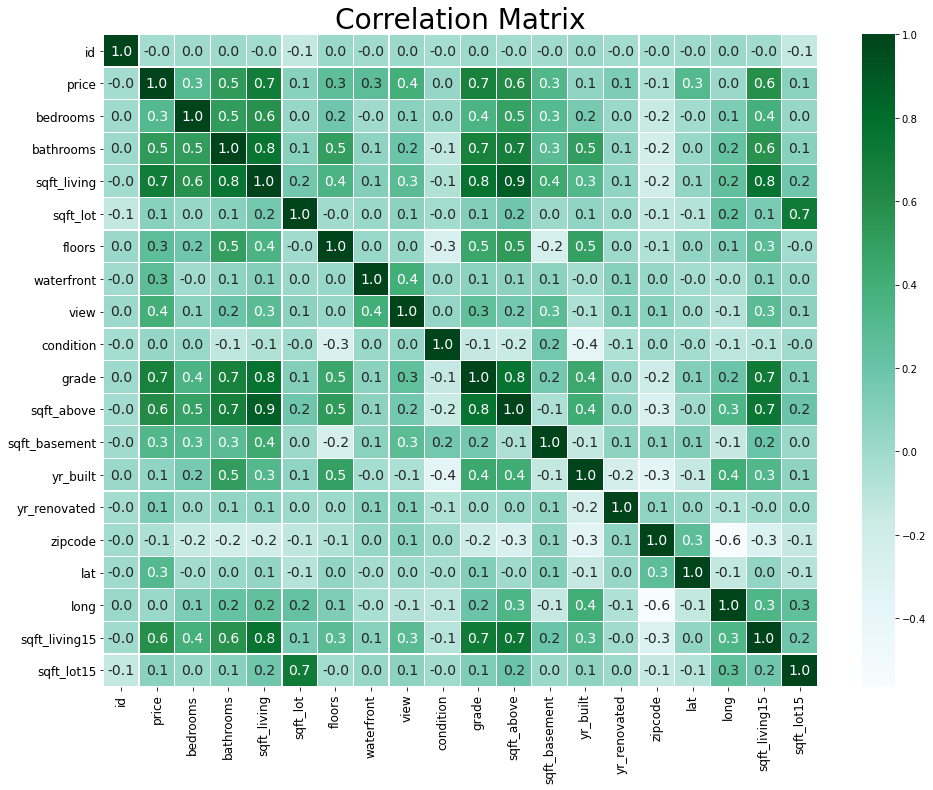

In [13]:
fig, ax = plt.subplots(figsize=(16, 12))
plt.title('Correlation Matrix',fontsize=28)
plt.xticks(fontsize=12, rotation=120)
plt.yticks(fontsize=12)

ax = sns.heatmap(base.corr(), annot=True, linewidths=0.25, linecolor='white', vmax=1, square=False, cmap='BuGn', fmt='.1f', annot_kws={"size":14})


A matriz dispõe a correlação entre todos os valores. Porém, é mais interessante para nós saber a correlação entre o preço e todos os outros fatores. Saber essas informações nos ajuda a ter uma visão de quais fatores.

## 1.3 - Correlação Preço x Todos os Atributos

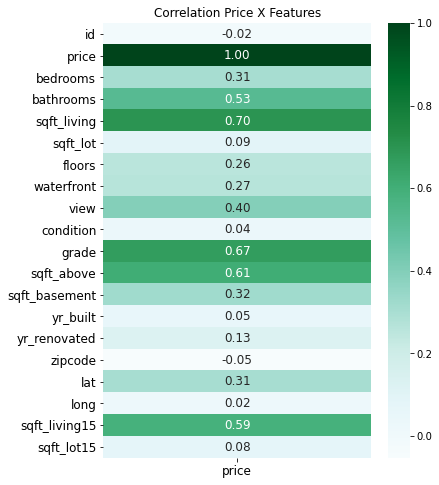

In [14]:
fig, ax1 = plt.subplots(figsize=(6, 8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Correlation Price X Features')
ax1 = sns.heatmap(base.corr()[['price']], annot=True, annot_kws={"size":12}, fmt='.2f', cmap='BuGn')

## 2.0 Separando X e Y
Separando os atributos previsores e o preço(variavel que queremos prever).

In [15]:
X = base.iloc[:, 3:19].values
y = base.iloc[:, 2].values

# Também é possivel dividir a base de ados da seguinte forma:
'''
X = base[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long']]
y= base[['price']]
'''

"\nX = base[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long']]\ny= base[['price']]\n"

# 3.0 - Random Forest
Usando RandomForest() para montar um regressor e analisar os resultados.

## 3.1 - Treinamento e Teste
De ínicio, vamos testar uma única vez, separando 30% da base de dados para teste.

In [16]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.3, random_state=0)

## 3.2 - Criando Regressor
Vou usar n_estimators=100, porém mais parametros podem ser usados e combinados.

In [17]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_treinamento, y_treinamento)

RandomForestRegressor()

## 3.3 - Score Atingido
Gerando previsoes e exibindo score atingido:

In [18]:
score = regressor.score(X_teste, y_teste)
score

0.8814007695726512

## 3.4 - Mean Absolute Error
Quanto (em média) nosso algortimo errou as previsões em valores absolutos?

In [19]:
previsoes = regressor.predict(X_teste)
mae = mean_absolute_error(y_teste, previsoes)

In [20]:
mae

67693.87907602351

## 3.5 - Visualização Gráfico
Vamos dar uma olhada na disposição dos dados numa relação entre as respostas corretas e os valores previstos pelo algoritmo.

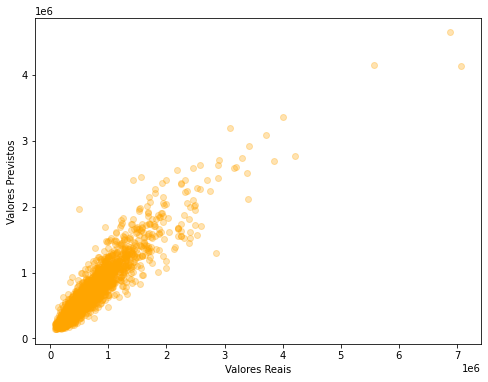

In [21]:
fig, ax1 = plt.subplots(figsize=(8,6))

ax1.scatter(y_teste, previsoes, color='orange', alpha=0.3)
ax1.set_xlabel('Valores Reais')
ax1.set_ylabel('Valores Previstos')
plt.show()

## Cross Validation
Para termos uma melhor validação da precisão do algortimo, vamos usar cross_val_score e executar 5 vezes(Em cada execucação, a base será dividida em 5 partes. 4 serão usadas para treinamento e 1 para teste)

In [22]:
y.reshape(-1,) # Apenas mudando a dimensão de y para 1d, evitando um Warning que surgiria na execução
scores = cross_val_score(RandomForestRegressor(n_estimators=100), X, y, cv=5)

In [23]:
# Scores atingidos em cada uma das execuções
scores

array([0.87666127, 0.88900503, 0.87112036, 0.86579024, 0.87188448])

In [24]:
# Média de Score de todas as execuções
scores.mean()

0.8748922782235828

In [25]:
# Desvio Padrão
scores.std() 

0.007853921158235216

# 4.0 - Regressão Linear Redes Neurais
Implementando um algoritmo de regressão usando redes neurais.

## 4.1 - Base de Dados
Separando os valores X, y(não é necessário executar esse célula caso ja tenha sido feito esse processo anteriormente)

In [26]:
X = base.iloc[:, 3:19].values
y = base.iloc[:, 2:3].values

## 4.2- Colocando os Dados em Escala
Muitos cálculos serão feitos para que a rede neural encontre o melhor conjunto de pesos durante o treinamento. Por isso, é importante colocar os dados na mesma escala, facilitando os cálculos pelo computador e reduzindo o tempo de execução

In [27]:
x_scaler = StandardScaler()
X = x_scaler.fit_transform(X)

y_scaler = StandardScaler()
y = y_scaler.fit_transform(y)

In [28]:
# Os valores escalonados:
X

array([[-0.39873715, -1.44746357, -0.97983502, ...,  1.87015159,
        -0.35257175, -0.30607896],
       [-0.39873715,  0.1756067 ,  0.53363434, ...,  0.87956753,
         1.16156823, -0.74634143],
       [-1.47395936, -1.44746357, -1.42625404, ..., -0.9333882 ,
         1.28353661, -0.13565477],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, ...,  1.23468257,
         0.24788796, -0.60432128],
       [-0.39873715,  0.50022075, -0.52252773, ..., -0.95207846,
        -0.18441416,  1.02891048],
       [-1.47395936, -1.77207762, -1.15404732, ...,  1.23468257,
         0.24572284, -0.60432128]])

In [29]:
# Separando Base de Teste e Treinamento
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.3, random_state=0)

## 4.3 - Criando Regressor

In [30]:
# Regressor MLPRegressor()
regressor_mlp = MLPRegressor(hidden_layer_sizes=(9,9))
regressor_mlp.fit(X_treinamento, y_treinamento)

C:\Users\julio\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPRegressor(hidden_layer_sizes=(9, 9))

## 4.4 - Score Atingido

In [31]:
score_treinamento = regressor_mlp.score(X_treinamento, y_treinamento)
score_treinamento

0.8990534814732045

In [32]:
score_teste = regressor_mlp.score(X_teste, y_teste)
score_teste

0.8871475972025602

## 4.5 - Mean Absolute Error
Quando nosso modelo erra em média em números absolutos?

In [33]:
previsoes = regressor_mlp.predict(X_teste)
previsoes = y_scaler.inverse_transform(previsoes) # Retornando os valores para escala inicial
y_teste = y_scaler.inverse_transform(y_teste)

mean_absolute_error(y_teste, previsoes)

73656.28216438151

## 4.6 - Visualização do Gráfico

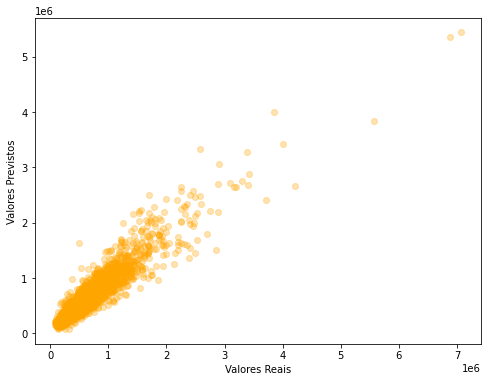

In [34]:
fig, ax1 = plt.subplots(figsize=(8,6))

ax1.scatter(y_teste, previsoes, color='orange', alpha=0.3)
ax1.set_xlabel('Valores Reais')
ax1.set_ylabel('Valores Previstos')
plt.show()

## 4.7 - Cross Validation
**É MUITO IMPORTANTE** que os dados estejam em escala, execute a célula 4.2 antes dessa.

In [35]:
y.reshape(-1,) # Apenas mudando a dimensão de y para 1d, evitando um Warning que surgiria na execução
scores = cross_val_score(MLPRegressor(hidden_layer_sizes=(9,9)), X, y, cv=5)

C:\Users\julio\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\julio\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\julio\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\julio\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

In [36]:
scores

array([0.88056675, 0.87004914, 0.8759721 , 0.8616286 , 0.85928997])

In [37]:
scores.mean()

0.8695013109717674

In [38]:
scores.std()

0.008134695711550325

### Resultados - Validação Cruzada

|**Regressor** | **Precisão Média** | **Desvio Padrão**|
| :------: | :------: | :------: |
Random Forest | 0.8747 | 0.0062 |
Redes Neurais(9,9) | 0.8732 | 0.0083|


# 5.0 - Conclusão 
Aparentemente o modelo RandomForest parece ter atingido uma precisão média superior do que a rede neural. Entretanto, isso não basta para afirmar que um algoritmo é melhor que outro ou que ambos seriam eficientes em um ambiente real. 

Mais testes precisariam ser feitos para descobrir por exemplo, se as bases estão sofrendo de **overfitting** , ou seja, se adaptaram de mais aos dados da base usada para treinamento tendo um bom resultado inicial, mas não teriam como manter esse desempenho em um abiente real.